In [ ]:
                              CİNSİYET VE YAŞ GRUBUNA GÖRE EVSİZ ÖLÜMLERİ.
*İngiltere ve Galler.
*İngiltere ve Galler'deki evsizlerin ölümlerinin sayısını cinsiyete, beş yıllık yaş grubuna göre gösteren 
*deneysel istatistikler.

In [ ]:
Veri Setinde Bulunan Sütunlar
*cinsiyet
*yas
*olum_turu
*ikibinyirmi
*ikibinondokuz
*ikibinonsekiz
*ikibinonyedi
*ikibinonalti
*ikibinonbes
*ikibinondort
*ikibinonuc

In [ ]:
                                     1. DOSYADAN VERİ OKUMA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
bg = pd.read_csv("data/homele.csv")
bg.head() #datasetimizi okuduk

,sex;age_group;type_of_death;2020;2019;2018;2017;2016;2015;2014;2013
0,Males;All ages;Identified deaths;430;497;478;4...
1,Males;15-19;Identified deaths;2;1;6;2;6;2;5;3
2,Males;20-24;Identified deaths;11;11;16;10;15;1...
3,Males;25-29;Identified deaths;28;26;23;29;29;2...
4,Males;30-34;Identified deaths;37;42;53;42;35;4...


In [2]:
bg = pd.read_csv("data/homele.csv", sep = ";") #sep verileri sütunlarına ayırır
bg.head()

,sex,age_group,type_of_death,2020,2019,2018,2017,2016,2015,2014,2013
0,Males,All ages,Identified deaths,430,497,478,414,414,379,348,360
1,Males,15-19,Identified deaths,2,1,6,2,6,2,5,3
2,Males,20-24,Identified deaths,11,11,16,10,15,16,14,11
3,Males,25-29,Identified deaths,28,26,23,29,29,28,22,22
4,Males,30-34,Identified deaths,37,42,53,42,35,40,38,45


In [3]:
#VERİYE İLK BAKIŞ

In [4]:
bg.tail()

,sex,age_group,type_of_death,2020,2019,2018,2017,2016,2015,2014,2013
47,Females,50-54,Estimated deaths,13,14,5,9,13,4,6,1
48,Females,55-59,Estimated deaths,3,6,8,4,1,2,2,4
49,Females,60-64,Estimated deaths,1,6,4,4,1,4,2,2
50,Females,65-69,Estimated deaths,0,1,0,4,1,0,0,1
51,Females,70-74,Estimated deaths,0,1,3,2,1,1,2,1


In [5]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sex            52 non-null     object
 1   age_group      52 non-null     object
 2   type_of_death  52 non-null     object
 3   2020           52 non-null     int64 
 4   2019           52 non-null     int64 
 5   2018           52 non-null     int64 
 6   2017           52 non-null     int64 
 7   2016           52 non-null     int64 
 8   2015           52 non-null     int64 
 9   2014           52 non-null     int64 
 10  2013           52 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 4.6+ KB


In [6]:
bg.columns= ['cinsiyet', 'yas', 'olum_turu', 'ikibinyirmi', 'ikibinondokuz', 'ikibinonsekiz', 'ikibinonyedi', 'ikibinonalti', 'ikibinonbes','ikibinondort', 'ikibinonuc'] 
bg.head()

,cinsiyet,yas,olum_turu,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,Males,All ages,Identified deaths,430,497,478,414,414,379,348,360
1,Males,15-19,Identified deaths,2,1,6,2,6,2,5,3
2,Males,20-24,Identified deaths,11,11,16,10,15,16,14,11
3,Males,25-29,Identified deaths,28,26,23,29,29,28,22,22
4,Males,30-34,Identified deaths,37,42,53,42,35,40,38,45


In [7]:
#ilk etapta object olarak görünen değişkenleri kategorik değişkenlere çevirelim
import pandas as pd 
bg.cinsiyet = pd.Categorical(bg.cinsiyet)
bg.yas = pd.Categorical(bg.yas)
bg.olum_turu = pd.Categorical(bg.olum_turu)
bg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   cinsiyet       52 non-null     category
 1   yas            52 non-null     category
 2   olum_turu      52 non-null     category
 3   ikibinyirmi    52 non-null     int64   
 4   ikibinondokuz  52 non-null     int64   
 5   ikibinonsekiz  52 non-null     int64   
 6   ikibinonyedi   52 non-null     int64   
 7   ikibinonalti   52 non-null     int64   
 8   ikibinonbes    52 non-null     int64   
 9   ikibinondort   52 non-null     int64   
 10  ikibinonuc     52 non-null     int64   
dtypes: category(3), int64(8)
memory usage: 4.4 KB


In [ ]:
                               2. VERİ SETİNİN BETİMLENMESİ

In [8]:
bg.describe().T #eksik gözlemleri göz ardı eder ve kategorik değişkenleri görmezden gelir

,count,mean,std,min,25%,50%,75%,max
ikibinyirmi,52.0,45.288462,101.292691,0.0,3.00,13.5,52.75,604.0
ikibinondokuz,52.0,51.557692,115.730826,0.0,6.00,13.0,60.00,687.0
ikibinonsekiz,52.0,48.692308,108.981657,0.0,5.00,13.5,56.25,641.0
ikibinonyedi,52.0,41.846154,88.693874,0.0,4.00,13.5,47.50,503.0
ikibinonalti,52.0,39.884615,87.741075,1.0,3.75,12.5,43.50,496.0
ikibinonbes,52.0,35.865385,80.077910,0.0,3.00,8.0,41.50,453.0
ikibinondort,52.0,33.673077,73.221052,0.0,5.00,11.0,38.75,412.0
ikibinonuc,52.0,33.576923,77.977962,0.0,2.00,9.0,33.75,443.0


In [ ]:
                                3. EKSİK DEĞERLERİN İNCELENMESİ

In [9]:
#eksik gözlem var mi?
import pandas as pd 
bg.isnull().values.any()

False

In [10]:
                                4. KATEGORİK DEĞİŞKEN ÖZETLERİ

In [18]:
bg.cinsiyet.unique() #cinsiyet kategoriler neler

['Males', 'Females']
Categories (2, object): ['Females', 'Males']

In [13]:
bg["cinsiyet"].value_counts().count() # kac kategori var

2

In [15]:
bg["cinsiyet"].value_counts() # kategorilerin frekanslari neler

Females    26
Males      26
Name: cinsiyet, dtype: int64

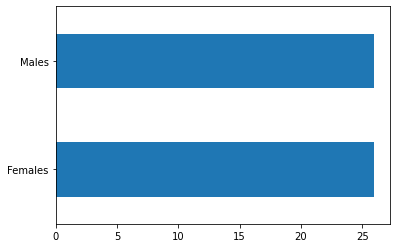

In [16]:
bg["cinsiyet"].value_counts().plot.barh(); #; bilgiyi kapatır

In [19]:
bg.yas.unique() #yas kategoriler neler

['All ages', '15-19', '20-24', '25-29', '30-34', ..., '50-54', '55-59', '60-64', '65-69', '70-74']
Length: 13
Categories (13, object): ['15-19', '20-24', '25-29', '30-34', ..., '60-64', '65-69', '70-74', 'All ages']

In [20]:
bg["yas"].value_counts().count() # kac kategori var

13

In [21]:
bg["yas"].value_counts() # kategorilerin frekanslari neler

15-19       4
20-24       4
25-29       4
30-34       4
35-39       4
40-44       4
45-49       4
50-54       4
55-59       4
60-64       4
65-69       4
70-74       4
All ages    4
Name: yas, dtype: int64

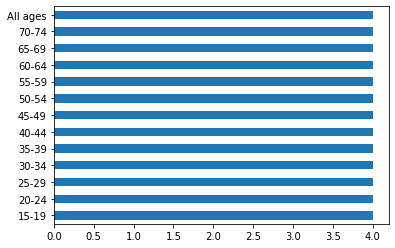

In [22]:
bg["yas"].value_counts().plot.barh(); #; bilgiyi kapatır

In [23]:
bg.olum_turu.unique() #olum_turu kategoriler neler

['Identified deaths', 'Estimated deaths']
Categories (2, object): ['Estimated deaths', 'Identified deaths']

In [24]:
bg["olum_turu"].value_counts().count() # kac kategori var

2

In [25]:
bg["olum_turu"].value_counts() # kategorilerin frekanslari neler

Estimated deaths     26
Identified deaths    26
Name: olum_turu, dtype: int64

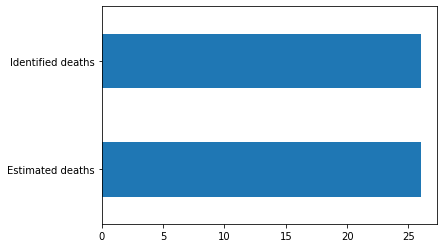

In [26]:
bg["olum_turu"].value_counts().plot.barh(); #; bilgiyi kapatır

In [ ]:
                                5. SÜREKLİ DEĞİŞKEN ÖZETLERİ

In [27]:
numbg = bg.select_dtypes(include = ["float64", "int64"]) #tip değişkenler gelir
numbg.head()

,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,430,497,478,414,414,379,348,360
1,2,1,6,2,6,2,5,3
2,11,11,16,10,15,16,14,11
3,28,26,23,29,29,28,22,22
4,37,42,53,42,35,40,38,45


In [28]:
numbg.describe().T

,count,mean,std,min,25%,50%,75%,max
ikibinyirmi,52.0,45.288462,101.292691,0.0,3.00,13.5,52.75,604.0
ikibinondokuz,52.0,51.557692,115.730826,0.0,6.00,13.0,60.00,687.0
ikibinonsekiz,52.0,48.692308,108.981657,0.0,5.00,13.5,56.25,641.0
ikibinonyedi,52.0,41.846154,88.693874,0.0,4.00,13.5,47.50,503.0
ikibinonalti,52.0,39.884615,87.741075,1.0,3.75,12.5,43.50,496.0
ikibinonbes,52.0,35.865385,80.077910,0.0,3.00,8.0,41.50,453.0
ikibinondort,52.0,33.673077,73.221052,0.0,5.00,11.0,38.75,412.0
ikibinonuc,52.0,33.576923,77.977962,0.0,2.00,9.0,33.75,443.0


In [29]:
print("Ortalama: " + str(numbg["ikibinyirmi"].mean()))
print("Dolu Gözlem Sayısı: " + str(numbg["ikibinyirmi"].count())) 
print("Maksimum Değer: " + str(numbg["ikibinyirmi"].max()))
print("Minimum Değer: " + str(numbg["ikibinyirmi"].min()))
print("Medyan: " + str(numbg["ikibinyirmi"].median()))
print("Standart Sapma: " + str(numbg["ikibinyirmi"].std()))

Ortalama: 45.28846153846154
Dolu Gözlem Sayısı: 52
Maksimum Değer: 604
Minimum Değer: 0
Medyan: 13.5
Standart Sapma: 101.29269112832425


In [ ]:
                                    6.DAĞILIM GRAFİKLERİ

In [ ]:
                                 6.1 Barplot (Sütün Grafik)
# !!!Eldeki kategorik değişkenleri görselleştirmek için kullanılır

Text(0.5, 1.0, 'Cinsiyet Değişkeninin Sınıf Frekansları')

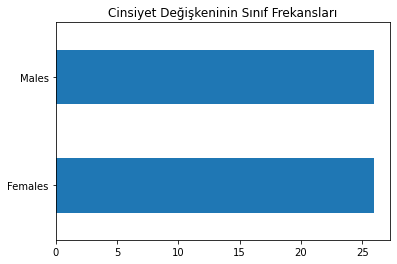

In [30]:
bg["cinsiyet"].value_counts().plot.barh().set_title("Cinsiyet Değişkeninin Sınıf Frekansları")

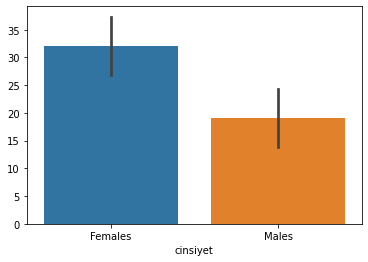

In [31]:
#aynısını seaborn kutuphanesi ile daha gorsel olarak gerceklestirebiliriz
sns.barplot(x = "cinsiyet", y = bg.cinsiyet.index, data= bg);

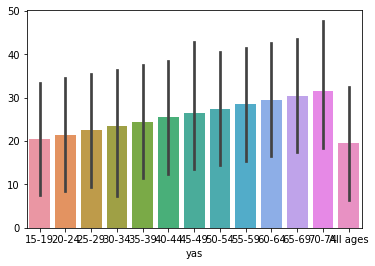

In [32]:
sns.barplot(x = "yas", y = bg.yas.index, data= bg);
#siyah çubuklar standart sapma değerini gösterir

In [ ]:
                             6.1.2 Sütun Grafiklerin Çaprazlanması 
# !!! Veri seti içerisinde bulunan değişkenlerin ve etkilerinin birlikte değerlendirilmesini, 
# kırılımların incelenmesini sağlar

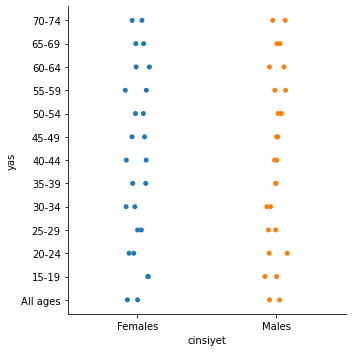

In [33]:
#cinsiyetin yaşa göre etkisini görmek istiyoruz
sns.catplot(x = "cinsiyet", y = "yas", data = bg);

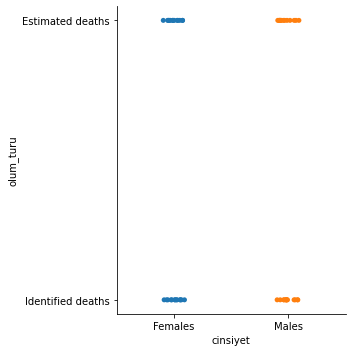

In [34]:
#cinsiyetin ölüm türüne göre etkisini görmek istiyoruz
sns.catplot(x = "cinsiyet", y = "olum_turu", data = bg); #tahmini-tespit edilen ölümler

In [ ]:
                              6.2 Histogram ve Yoğunluk Grafiği
# !!! Sayısal değişkenleri görselleştirmek için kullanılır

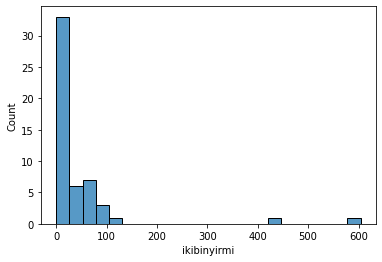

In [35]:
sns.histplot(bg.ikibinyirmi);

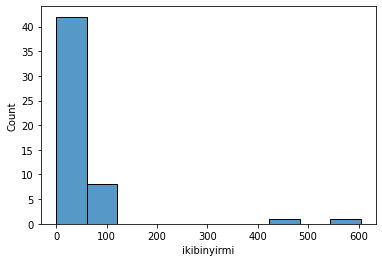

In [36]:
sns.histplot(bg.ikibinyirmi, bins = 10);

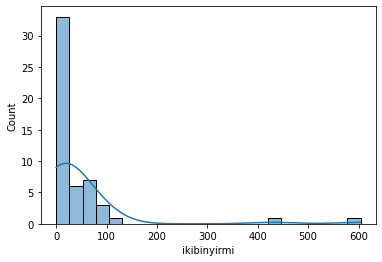

In [37]:
sns.histplot(bg.ikibinyirmi,kde=True); #kde olasılık yogunluk fonksiyonu

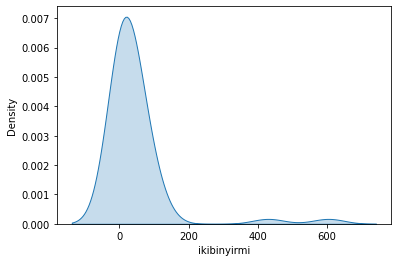

In [38]:
sns.kdeplot(bg.ikibinyirmi, shade = True);

In [ ]:
                            6.2.2 Histogram Grafiklerinin Çaprazlanması
# !!! Veri seti içerisinde bulunan değişkenlerin ve etkilerinin birlikte değerlendirilmesini, 
# kırılımların incelenmesini sağlar

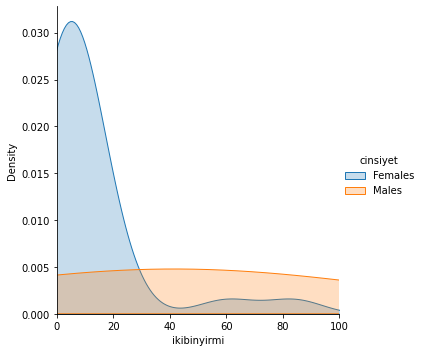

In [39]:
#Grafik üzerinde eklenen boyutları bölerek görüntülemek için kullanılır.
#ustte belirttigimiz grafigi map'leyerek facegrid'e uyguladik 
#boylece her bir cut degeri icin ayni yogunluk fonksiyonunu gözlemlemis olacagiz
(sns
 .FacetGrid(bg,
              hue = "cinsiyet",
              height = 5,
              xlim = (0, 100)) #10000 di
 .map(sns.kdeplot, "ikibinyirmi", shade= True)
 .add_legend()
);

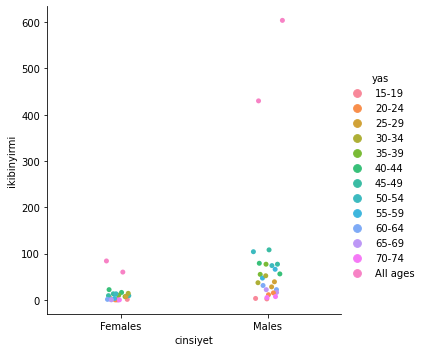

In [40]:
sns.catplot(x = "cinsiyet", y = "ikibinyirmi", hue = "yas", data = bg);

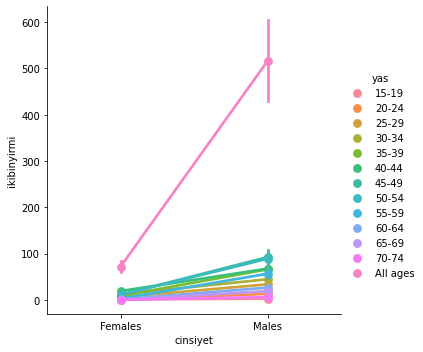

In [41]:
sns.catplot(x = "cinsiyet", y = "ikibinyirmi", hue = "yas", kind = "point", data = bg);

In [ ]:
                                  6.3 Boxplot (Kutu Grafiği)
# !!! Sayısal değişkenleri görselleştirmek için

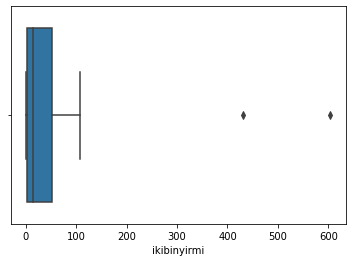

In [42]:
#quartiller araciligiyla bilgiler sunar
sns.boxplot(x = bg["ikibinyirmi"]); #max değere doğru giden noktalar aykırı değerleri ifade eder

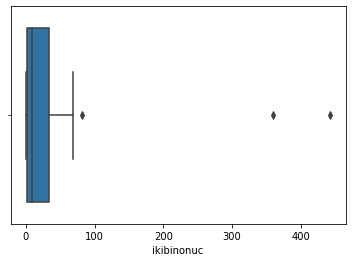

In [43]:
sns.boxplot(x = bg["ikibinonuc"]); 

In [ ]:
                     6.3.2 Boxplot (Kutu Grafiği) Çaprazlama

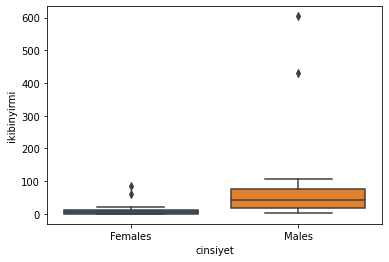

In [44]:
#Hangi cinsiyet ikibinyirmi yılında daha fazla ölmüş?
sns.boxplot(x = "cinsiyet", y = "ikibinyirmi", data = bg);

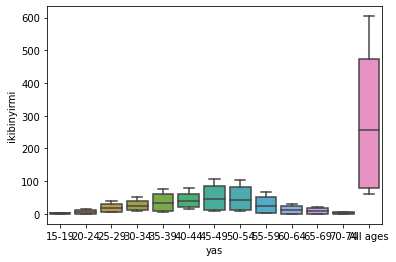

In [45]:
#hangi yas aralığı ikibinyirmi yılında ölmüş?
sns.boxplot(x = "yas", y = "ikibinyirmi", data = bg);

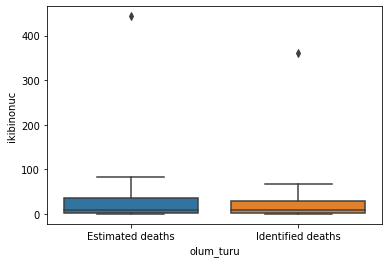

In [46]:
#hangi cinsiyet ikibinonuc yılında ölmüş?
sns.boxplot(x = "olum_turu", y = "ikibinonuc", data = bg);

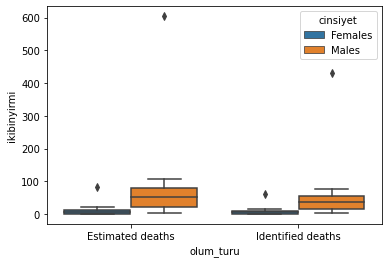

In [47]:
sns.boxplot(x = "olum_turu", y = "ikibinyirmi", hue = "cinsiyet", data = bg);

In [48]:
                           6.4 ViolinPlot (Violin Grafiği)
# !!! Sayısal değişkenleri görselleştirmek için - Ek olarak yoğunluk anlamında bilgi sunar

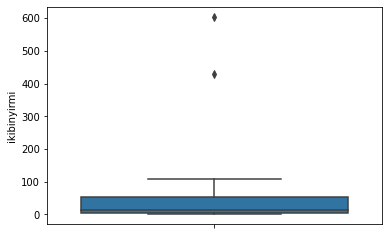

In [49]:
sns.boxplot(y = "ikibinyirmi",  data = bg);

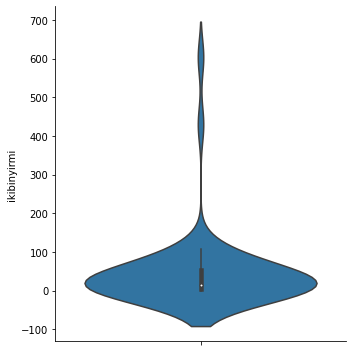

In [50]:
sns.catplot(y = "ikibinyirmi", kind = "violin", data = bg);

In [ ]:
                        6.4.2 ViolinPlot (Violin Grafiği) Çaprazlama

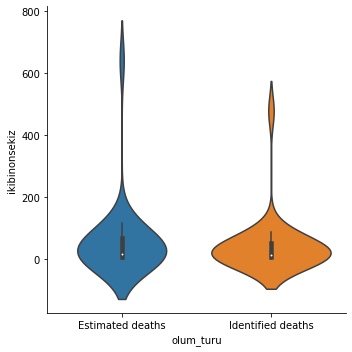

In [51]:
sns.catplot(x= "olum_turu", y = "ikibinonsekiz", kind = "violin", data = bg);

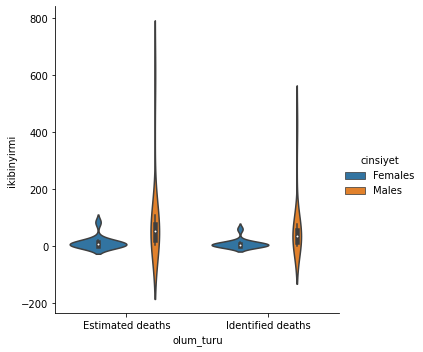

In [52]:
sns.catplot(x= "olum_turu", y = "ikibinyirmi", hue = "cinsiyet",kind = "violin", data = bg);

In [ ]:
                                 7. KORELASYON GRAFİKLERİ
# !!! Değişkenler arasındaki ilişkiyi ifade eder 

In [ ]:
                                     7.1 Scatter Plot
# !!! Saçılım Grafiği, sayısal değişkenler arasındaki ilişkiyi gösterir

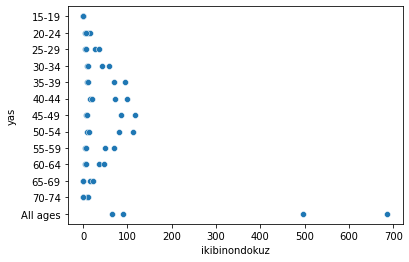

In [53]:
#yas ve 2019 yılı arasındaki ilişki
sns.scatterplot(x = "ikibinondokuz", y = "yas", data = bg);

In [ ]:
                              7.1.2 Scatter Plot Çaprazlama

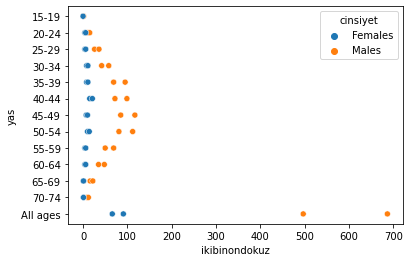

In [54]:
sns.scatterplot(x = "ikibinondokuz", y = "yas", hue = "cinsiyet",data = bg);

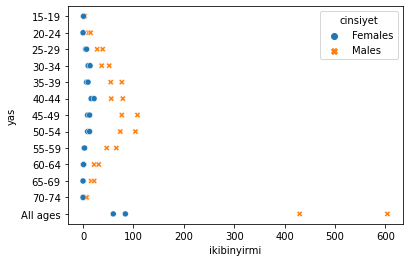

In [55]:
sns.scatterplot(x = "ikibinyirmi", y = "yas", hue = "cinsiyet", style = "cinsiyet", data = bg);

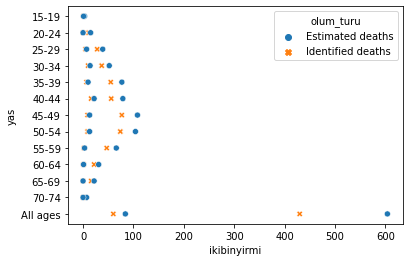

In [56]:
sns.scatterplot(x = "ikibinyirmi", y = "yas", hue = "olum_turu", style = "olum_turu", data = bg);

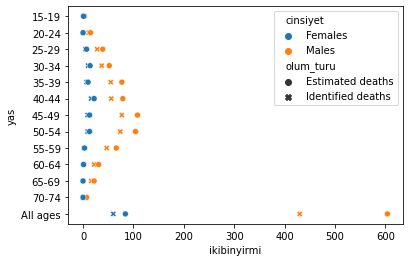

In [57]:
sns.scatterplot(x = "ikibinyirmi", y = "yas", hue = "cinsiyet", style = "olum_turu", data = bg);

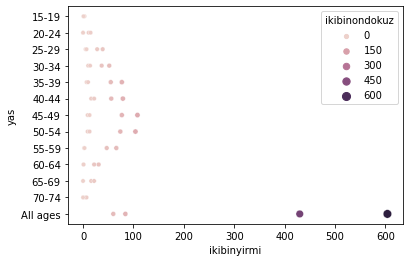

In [58]:
sns.scatterplot(x = "ikibinyirmi", y = "yas", hue= "ikibinondokuz", size = "ikibinondokuz", data = bg);

In [ ]:
                        7.2 Doğrusal İlişkinin  Gösterilmesi

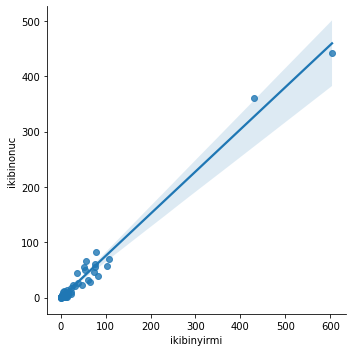

In [59]:
sns.lmplot(x = "ikibinyirmi", y = "ikibinonuc", data = bg);

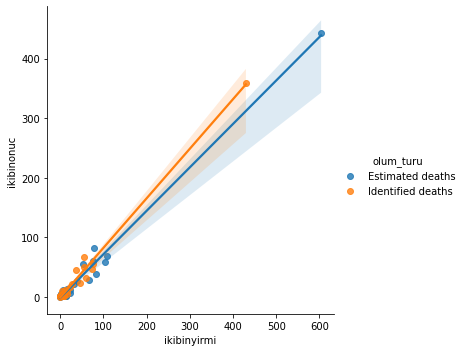

In [60]:
sns.lmplot(x = "ikibinyirmi", y = "ikibinonuc", hue = "olum_turu", data = bg);

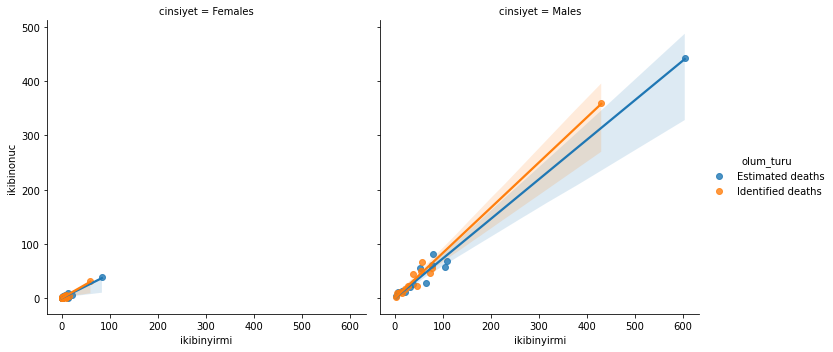

In [61]:
sns.lmplot(x = "ikibinyirmi", y = "ikibinonuc", hue = "olum_turu", col = "cinsiyet", data = bg);

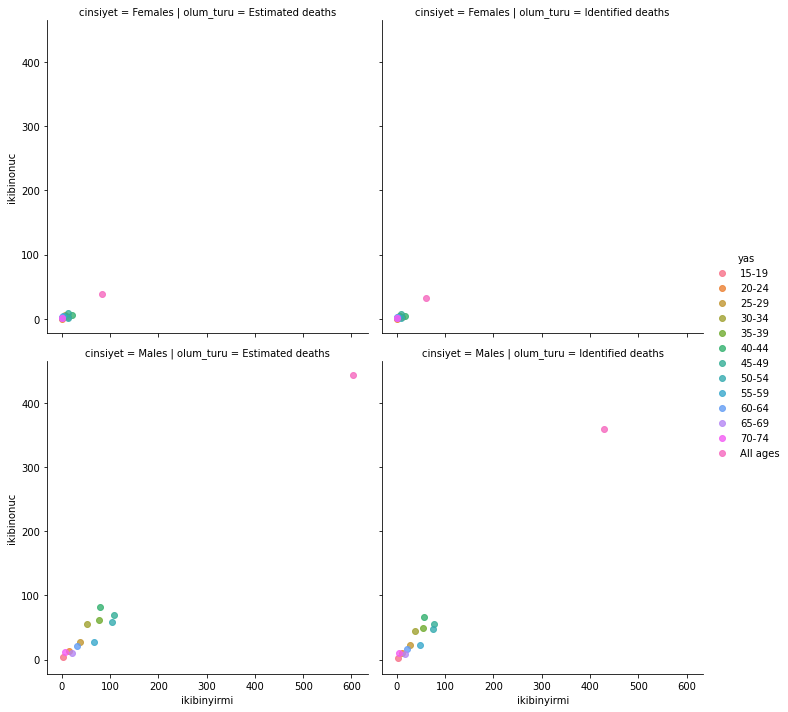

In [62]:
sns.lmplot(x = "ikibinyirmi", y = "ikibinonuc", hue = "yas", col = "olum_turu", row = "cinsiyet", data = bg);

In [ ]:
                                    7.3 Scatterplot Matrisi
# !!! Sayısal değişkenler arasındaki ilişkiyi matris şeklinde gösterir

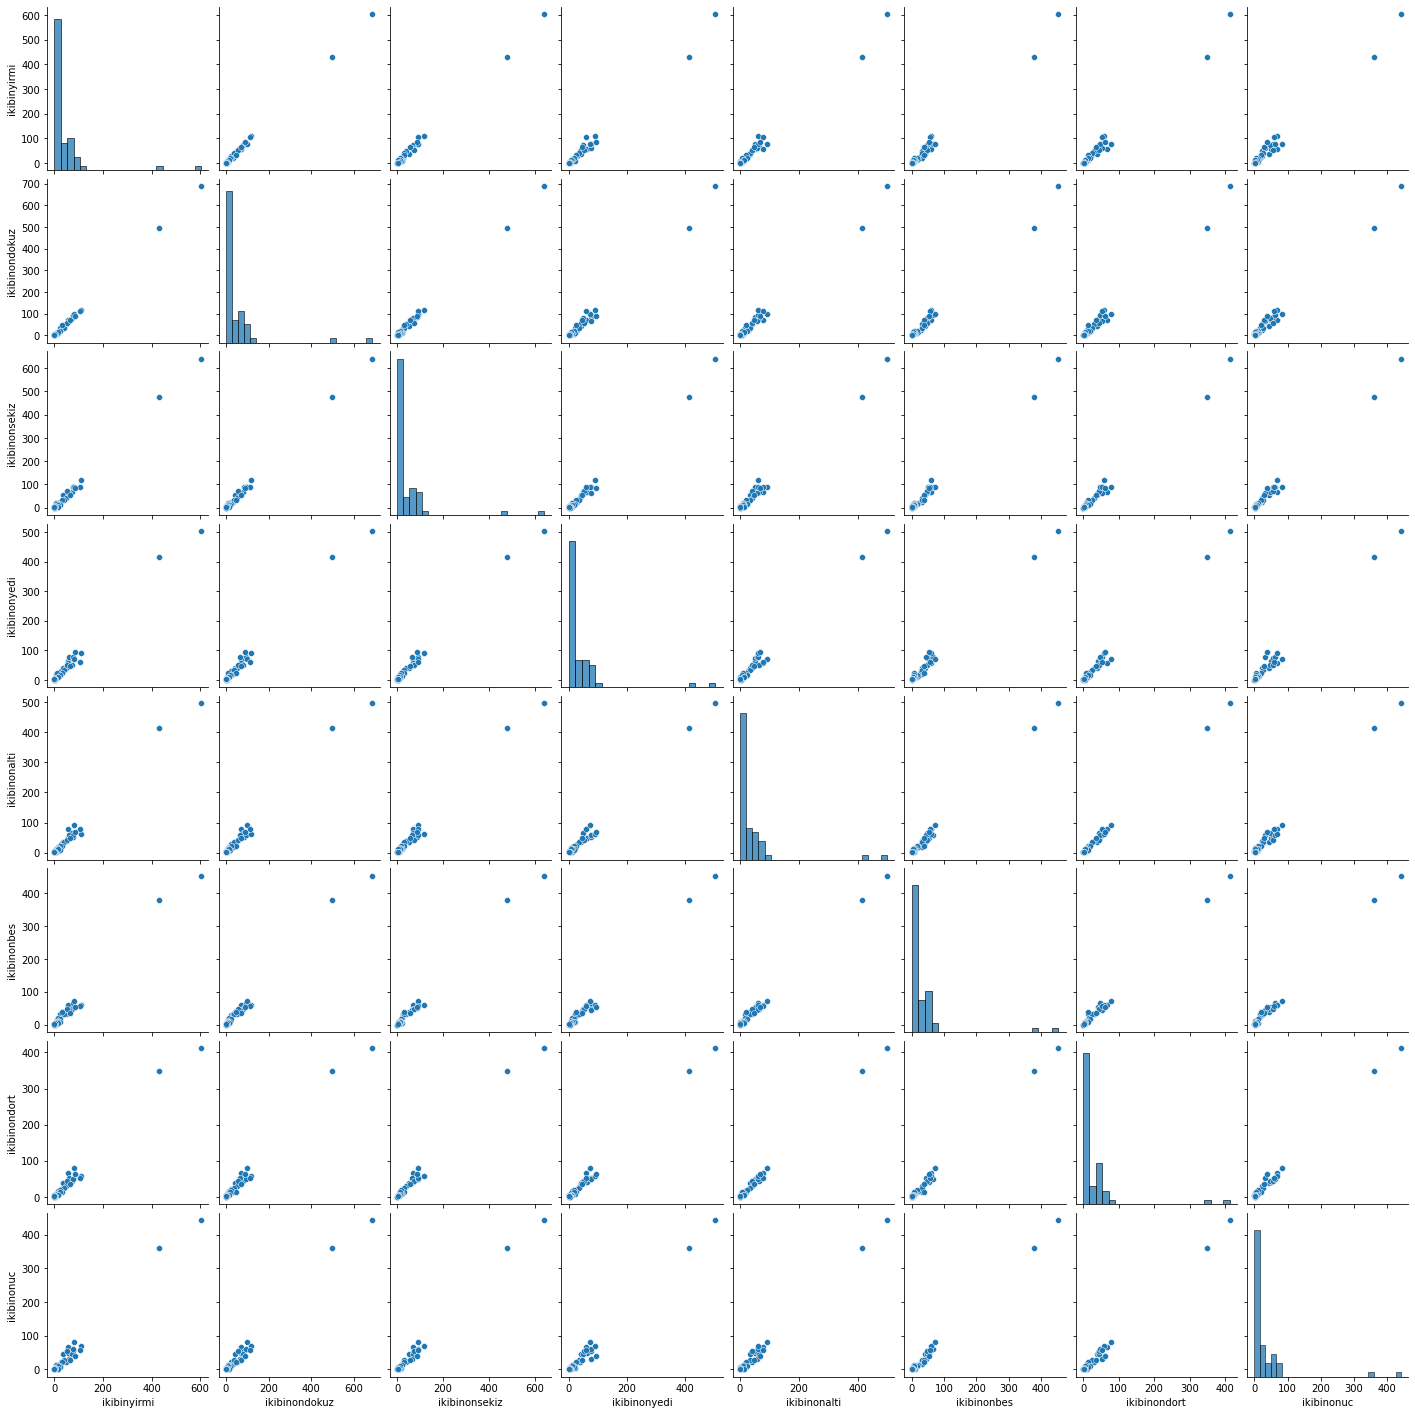

In [63]:
#solda satır isimleri altta sutun isimlerinin çaprazlanma sonuçları
sns.pairplot(bg);

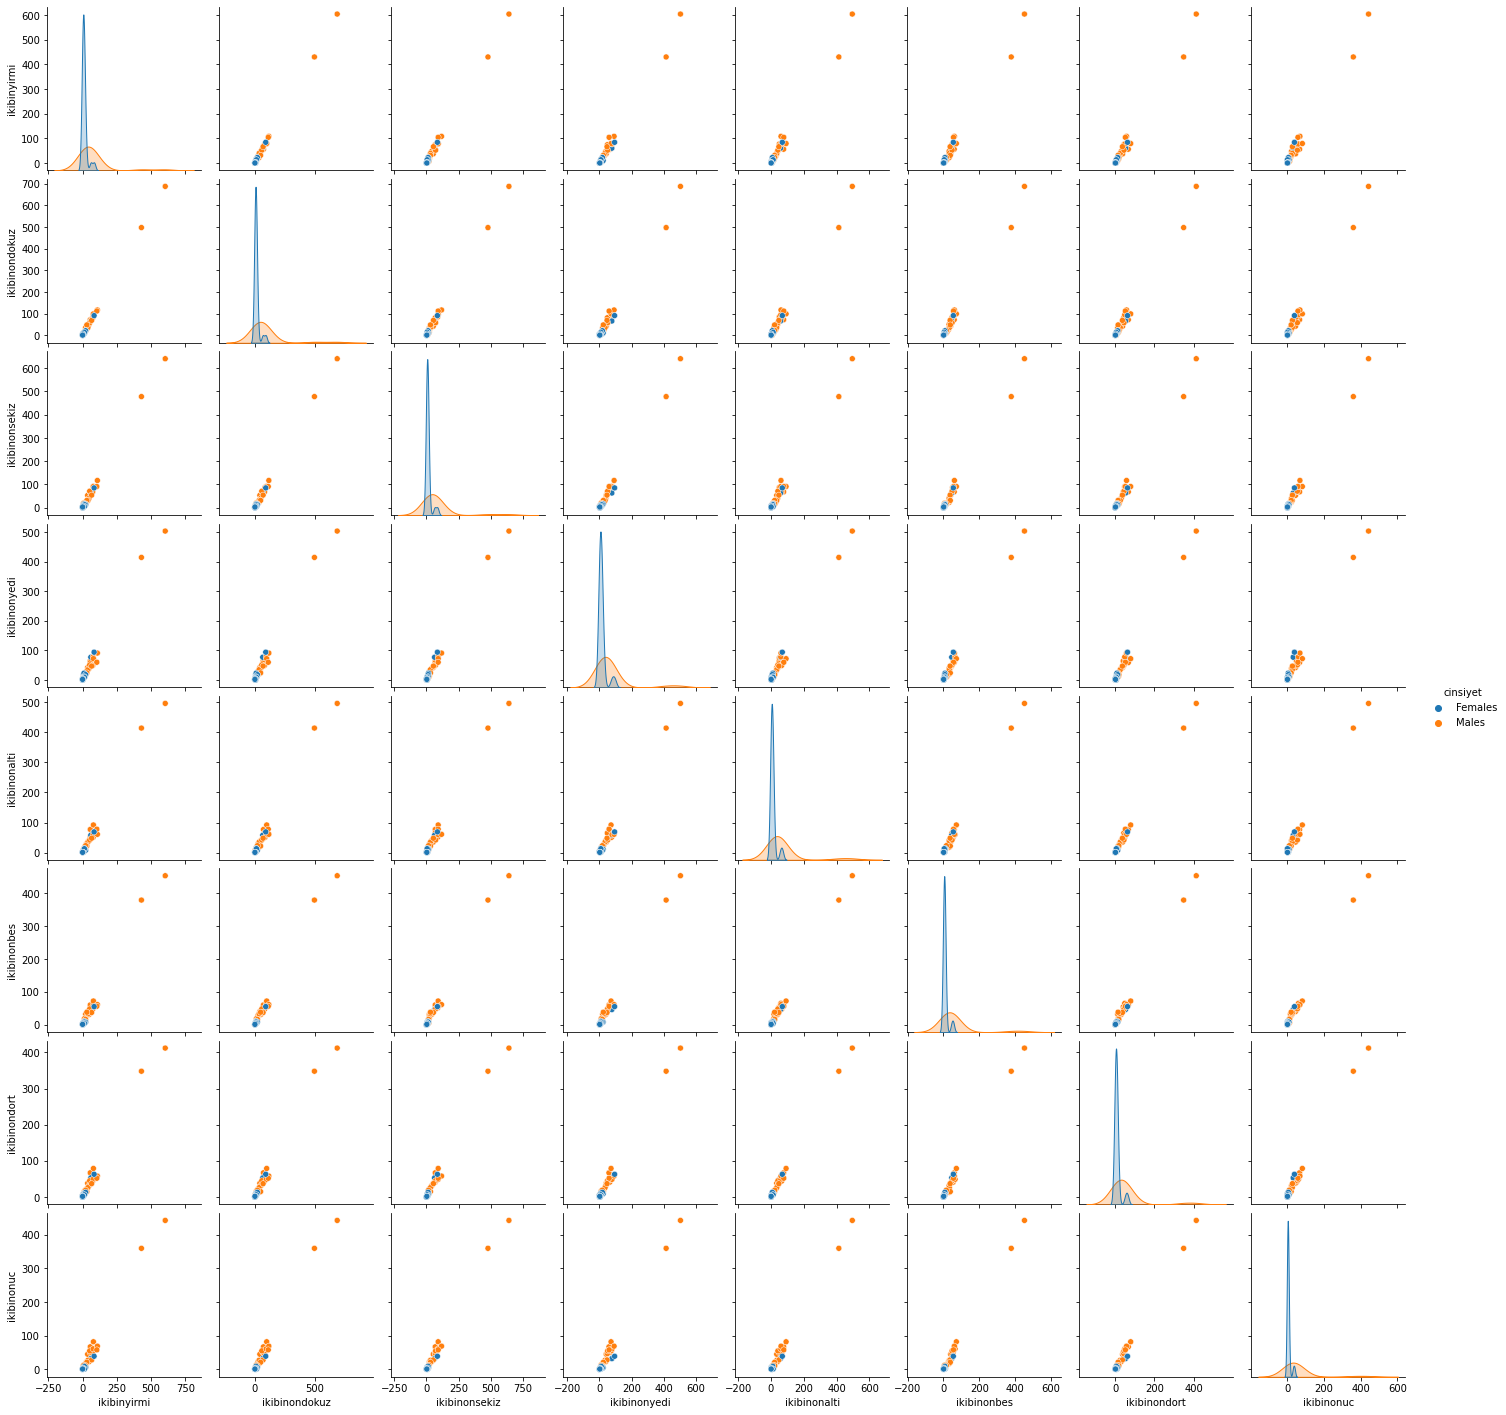

In [64]:
#tür bilgisini de grafiğe ekleyelim
sns.pairplot(bg, hue = "cinsiyet");

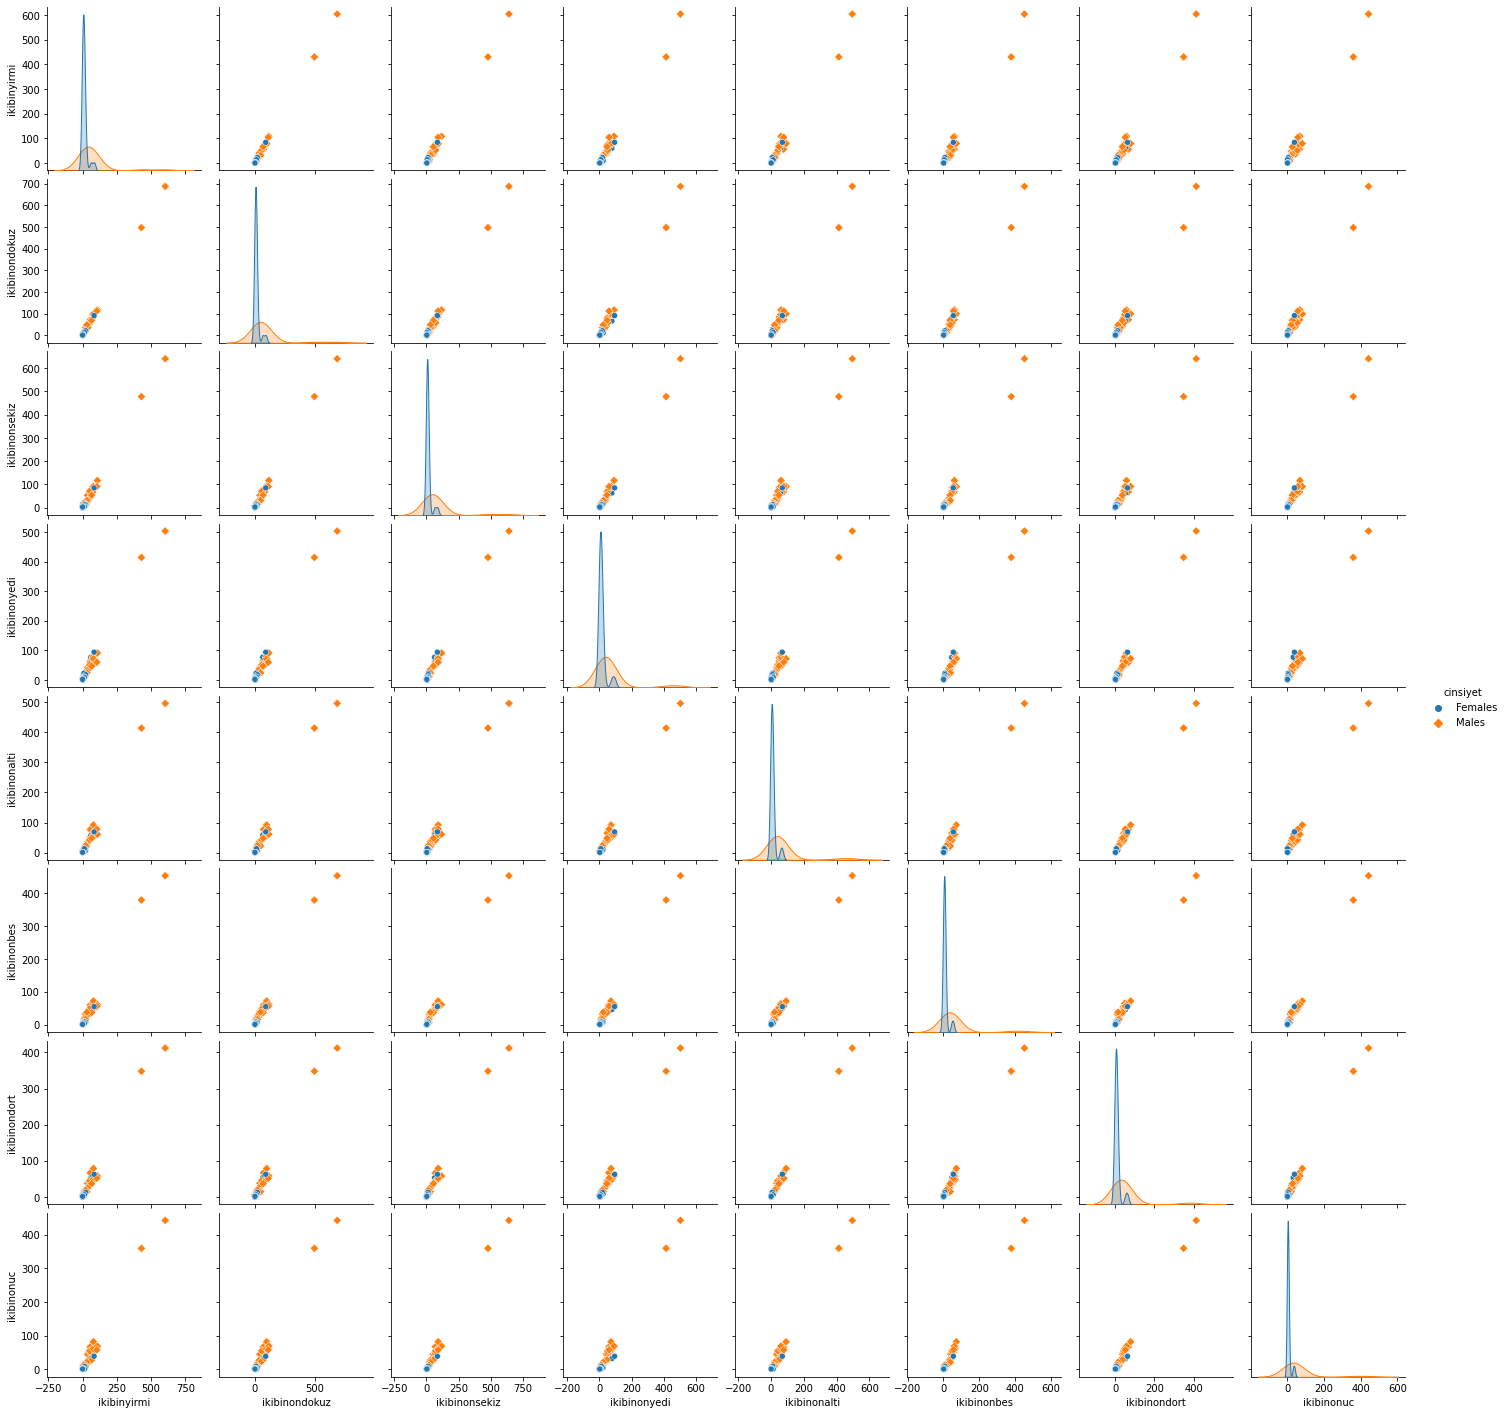

In [65]:
sns.pairplot(bg, hue = "cinsiyet", markers = ["o","D"]);

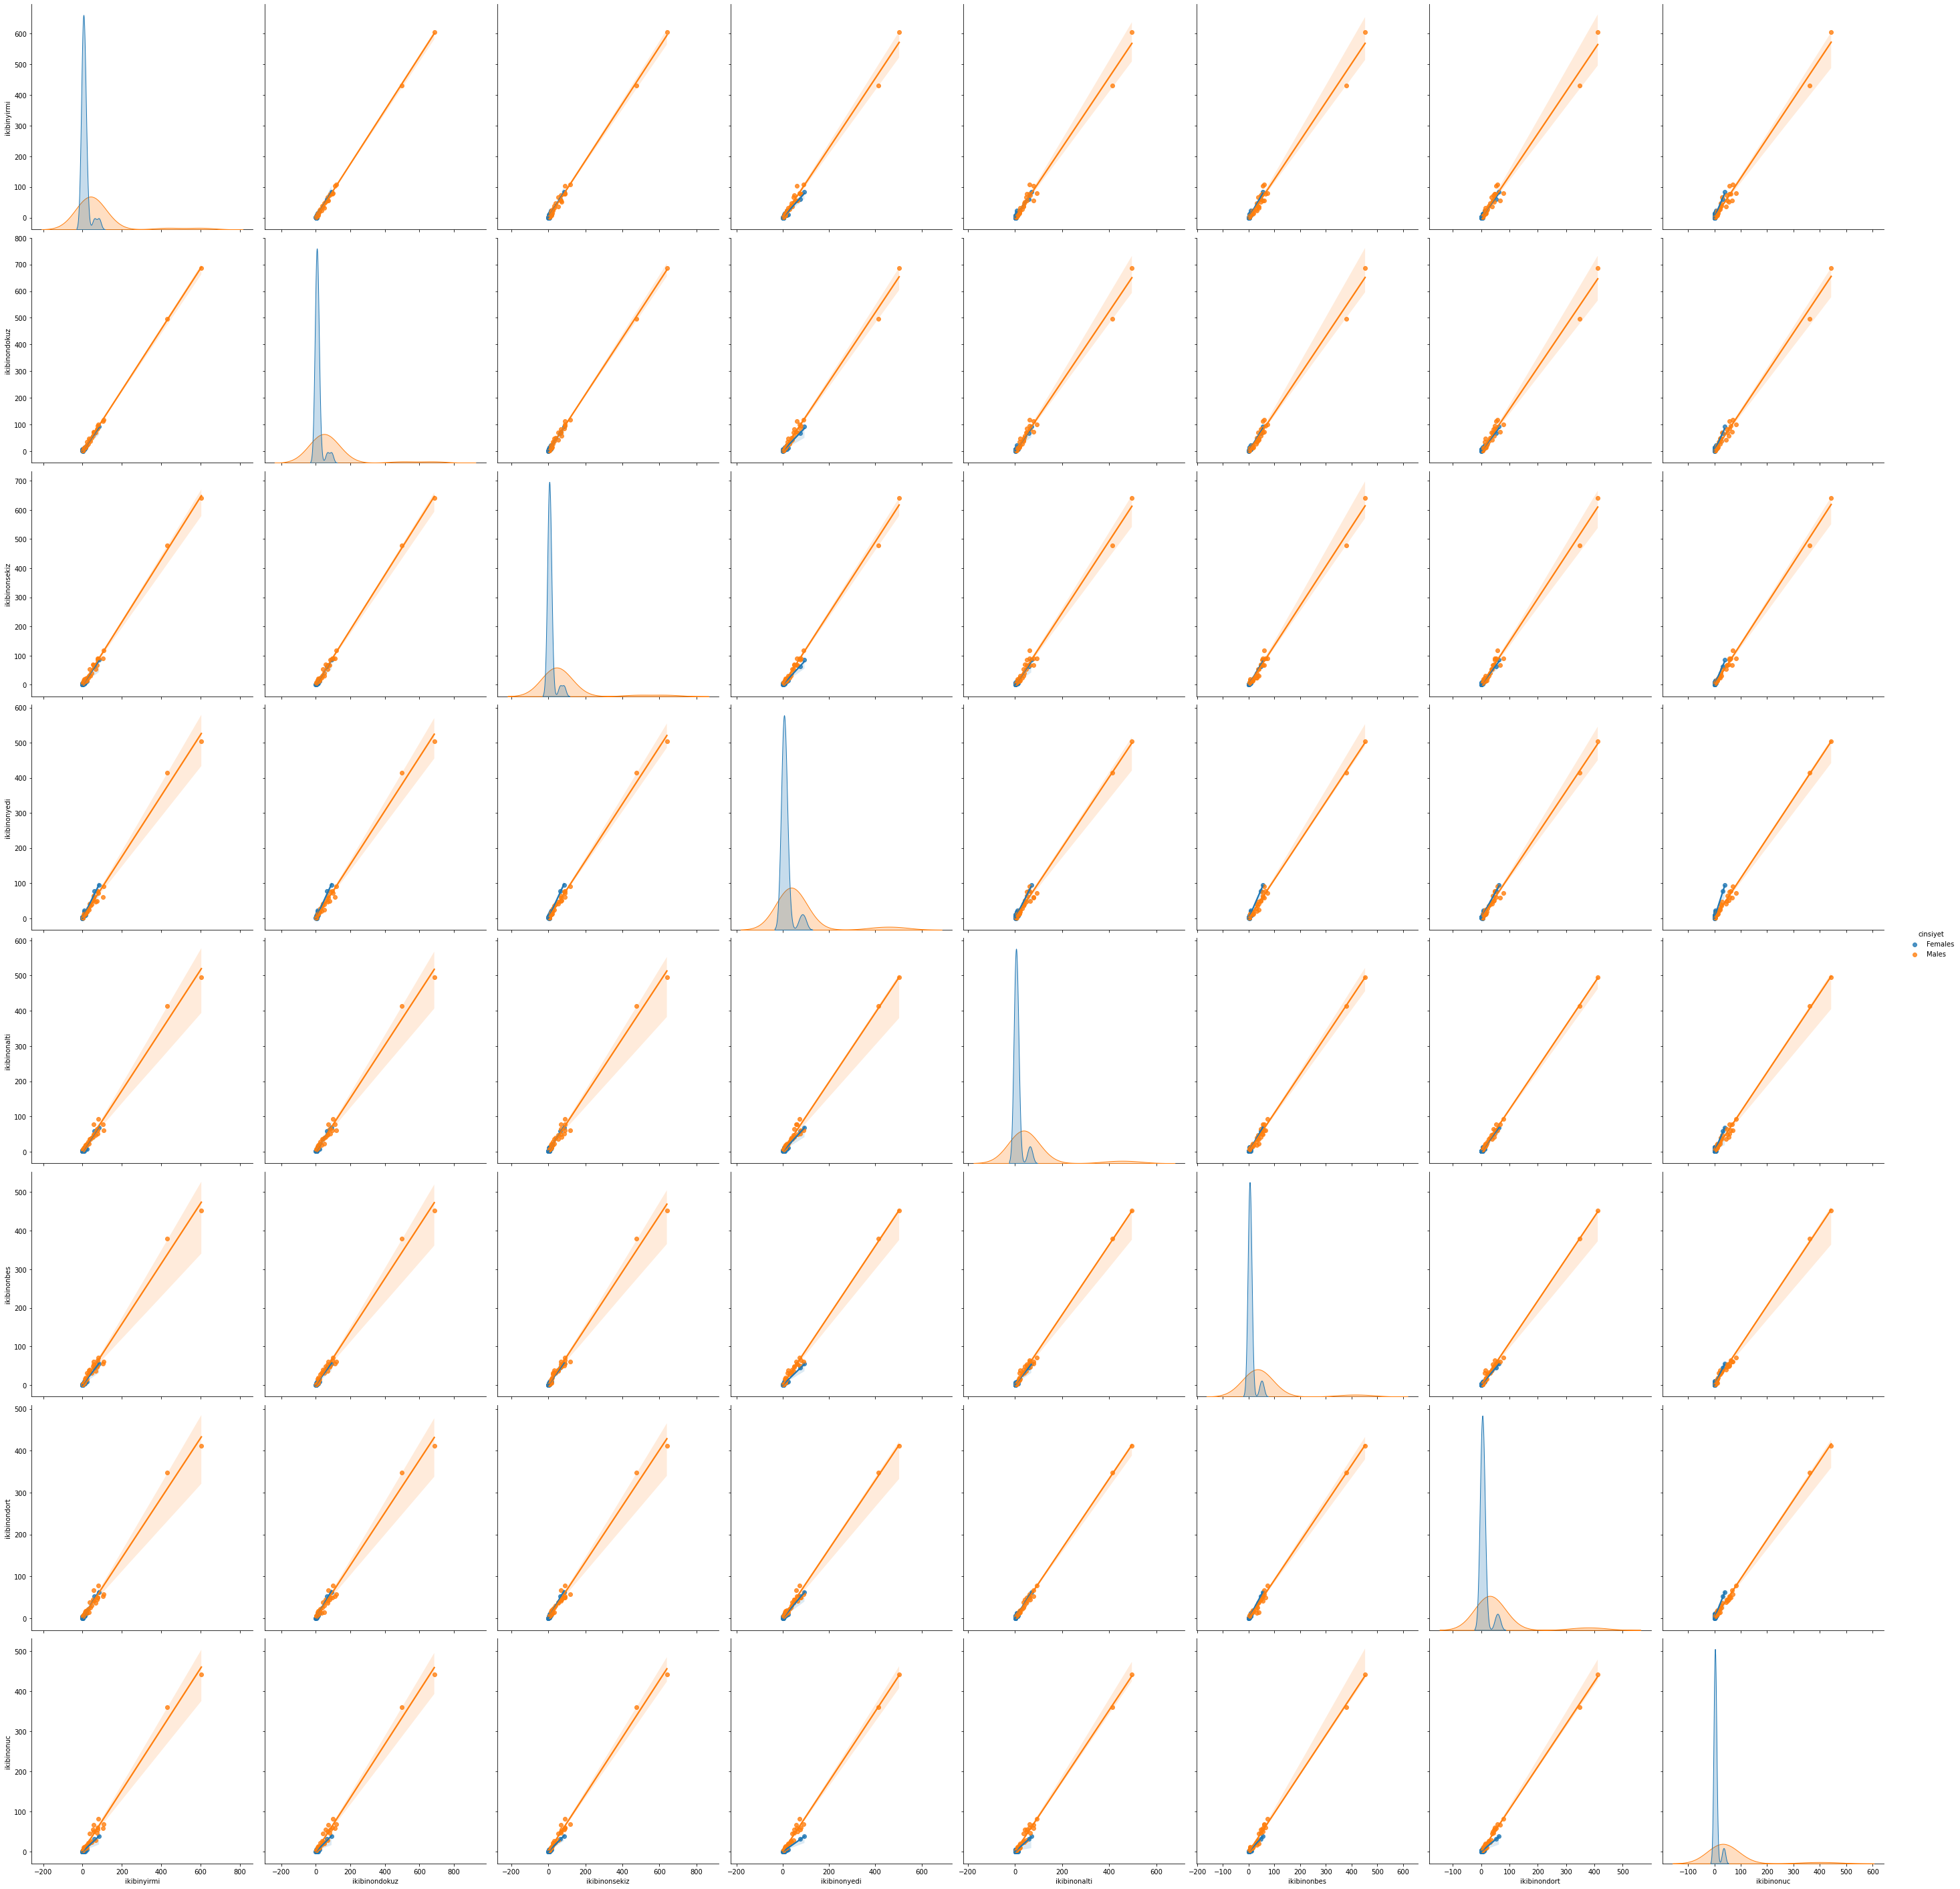

In [66]:
sns.pairplot(bg, kind = "reg", hue = "cinsiyet",height=5);

In [ ]:
                                       7.4 Çizgi Grafiği

In [67]:
bg.groupby("ikibinyirmi")["ikibinonuc"].describe()

,count,mean,std,min,25%,50%,75%,max
ikibinyirmi,,,,,,,,
0,6.0,0.666667,0.516398,0.0,0.25,1.0,1.00,1.0
1,4.0,1.500000,0.577350,1.0,1.00,1.5,2.00,2.0
2,2.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0
3,2.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0
5,2.0,7.500000,3.535534,5.0,6.25,7.5,8.75,10.0
7,3.0,7.333333,4.163332,4.0,5.00,6.0,9.00,12.0
9,2.0,4.000000,4.242641,1.0,2.50,4.0,5.50,7.0
10,2.0,3.500000,2.121320,2.0,2.75,3.5,4.25,5.0
11,1.0,11.000000,NaN,11.0,11.00,11.0,11.00,11.0


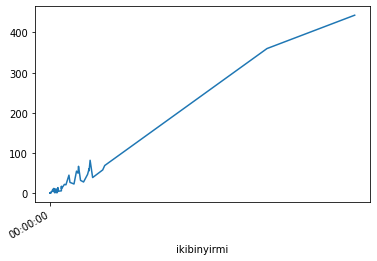

In [68]:
a=bg["ikibinonuc"]
a.index = pd.DatetimeIndex(bg["ikibinyirmi"])
a.plot();

In [ ]:
                               8. VERİ BİLİMİ İÇİN İSTATİSTİK

In [ ]:
                                 8.1 Betimsel İstatistik
# !!! varyans, ortalama etrafındaki dağılımın ölçüsü
#kovaryans, iki değişken arasındaki değişkenlik ölçüsü
#korelasyon, iki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, ilişkenin şiddetini ve 
#yönünü ifade eden istatistiksel bir tekniktir.

In [69]:
!pip install researchpy
import researchpy as rp

You should consider upgrading via the 'C:\Users\BÜŞRA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [70]:
#surekli (sayısal) değişkenler için kullanılır.
rp.summary_cont(bg[["ikibinyirmi","ikibinondokuz","ikibinonsekiz","ikibinonyedi","ikibinonalti","ikibinonbes","ikibinondort","ikibinonuc"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,ikibinyirmi,52.0,45.2885,101.2927,14.0468,17.0884,73.4885
1,ikibinondokuz,52.0,51.5577,115.7308,16.0490,19.3380,83.7774
2,ikibinonsekiz,52.0,48.6923,108.9817,15.1130,18.3516,79.0330
3,ikibinonyedi,52.0,41.8462,88.6939,12.2996,17.1536,66.5387
4,ikibinonalti,52.0,39.8846,87.7411,12.1675,15.4573,64.3119
5,ikibinonbes,52.0,35.8654,80.0779,11.1048,13.5716,58.1592
6,ikibinondort,52.0,33.6731,73.2211,10.1539,13.2882,54.0579
7,ikibinonuc,52.0,33.5769,77.9780,10.8136,11.8677,55.2861


In [71]:
#kategorik değişkenler için kullanılır.
rp.summary_cat(bg[["cinsiyet","olum_turu","yas"]])

,Variable,Outcome,Count,Percent
0,cinsiyet,Females,26,50.00
1,,Males,26,50.00
2,olum_turu,Estimated deaths,26,50.00
3,,Identified deaths,26,50.00
4,yas,15-19,4,7.69
5,,20-24,4,7.69
6,,25-29,4,7.69
7,,30-34,4,7.69
8,,35-39,4,7.69
9,,40-44,4,7.69


In [72]:
bg[["ikibinyirmi","ikibinondokuz","ikibinonsekiz","ikibinonyedi","ikibinonalti","ikibinonbes","ikibinondort","ikibinonuc"]].cov()

,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
ikibinyirmi,10260.209276,11713.306561,11011.796380,8923.437406,8820.053544,8044.000377,7349.037330,7825.359729
ikibinondokuz,11713.306561,13393.624057,12591.822021,10202.558069,10090.418552,9213.311840,8408.950603,8962.691554
ikibinonsekiz,11011.796380,12591.822021,11877.001508,9626.755656,9501.238311,8684.487179,7933.897436,8463.396682
ikibinonyedi,8923.437406,10202.558069,9626.755656,7866.603318,7732.785822,7066.665158,6465.752640,6861.815988
ikibinonalti,8820.053544,10090.418552,9501.238311,7732.785822,7698.496229,7003.827300,6414.687029,6808.695324
ikibinonbes,8044.000377,9213.311840,8684.487179,7066.665158,7003.827300,6412.471719,5845.661011,6226.510558
ikibinondort,7349.037330,8408.950603,7933.897436,6465.752640,6414.687029,5845.661011,5361.322398,5687.388386
ikibinonuc,7825.359729,8962.691554,8463.396682,6861.815988,6808.695324,6226.510558,5687.388386,6080.562594


In [73]:
bg[["ikibinyirmi","ikibinondokuz","ikibinonsekiz","ikibinonyedi","ikibinonalti","ikibinonbes","ikibinondort","ikibinonuc"]].corr()

,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
ikibinyirmi,1.000000,0.999200,0.997532,0.993254,0.992408,0.991702,0.990869,0.990728
ikibinondokuz,0.999200,1.000000,0.998358,0.993954,0.993704,0.994155,0.992332,0.993156
ikibinonsekiz,0.997532,0.998358,1.000000,0.995939,0.993628,0.995126,0.994254,0.995908
ikibinonyedi,0.993254,0.993954,0.995939,1.000000,0.993664,0.994966,0.995611,0.992141
ikibinonalti,0.992408,0.993704,0.993628,0.993664,1.000000,0.996827,0.998474,0.995151
ikibinonbes,0.991702,0.994155,0.995126,0.994966,0.996827,1.000000,0.996977,0.997149
ikibinondort,0.990869,0.992332,0.994254,0.995611,0.998474,0.996977,1.000000,0.996105
ikibinonuc,0.990728,0.993156,0.995908,0.992141,0.995151,0.997149,0.996105,1.000000


In [ ]:
                                         9. AYKIRI GÖZLEM
#Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere 
#aykırı gözlem denir.
#Aykırılığı ifade eden nümerik değere **aykırı değer** denir.
#Aykırı değeri barındıran gözlem birimine **aykırı gözlem** denir.
#Genellenebilirlik kaygısıyla oluşturulan kural setlerini yanıltır. Yanlılığa sebep olur. 
#Bu nedenle genellemenin dışında kalacak aykırı verilerin çalışmanın dışına çıkartılması gerekir.

In [ ]:
                                  9.1 Aykırı Değerlerin Tespiti

In [74]:
bg = bg.select_dtypes(include = ['float64', 'int64']) #sadece sayısal değerleri alıyoruz
bg = bg.dropna()
bg.head()

,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,430,497,478,414,414,379,348,360
1,2,1,6,2,6,2,5,3
2,11,11,16,10,15,16,14,11
3,28,26,23,29,29,28,22,22
4,37,42,53,42,35,40,38,45


In [75]:
bg_table = bg["ikibinyirmi"]
bg_table.head()

0    430
1      2
2     11
3     28
4     37
Name: ikibinyirmi, dtype: int64

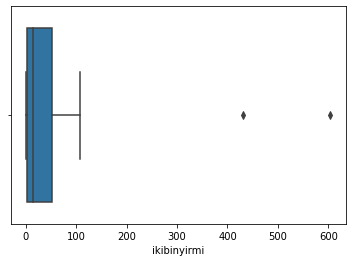

In [76]:
sns.boxplot(x = bg_table);

In [77]:
Q1 = bg_table.quantile(0.25)
Q3 = bg_table.quantile(0.75)
IQR = Q3-Q1

In [78]:
print(Q1)
print(Q3)
print(IQR)

3.0
52.75
49.75


In [79]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [80]:
print(alt_sinir)
print(ust_sinir)

-71.625
127.375


In [81]:
(bg_table < alt_sinir) | (bg_table > ust_sinir)

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: ikibinyirmi, dtype: bool

In [82]:
aykiri_tf = (bg_table < alt_sinir) | (bg_table > ust_sinir)
bg_table[aykiri_tf]

0     430
26    604
Name: ikibinyirmi, dtype: int64

In [83]:
bg_table[aykiri_tf].index

Int64Index([0, 26], dtype='int64')

In [ ]:
                              9.2 Aykırı Değerler Sorununun Çözülmesi

In [84]:
bg_table[aykiri_tf]

0     430
26    604
Name: ikibinyirmi, dtype: int64

In [85]:
import pandas as pd
type(bg_table)

pandas.core.series.Series

In [86]:
bg_table = pd.DataFrame(bg_table)
bg_table.shape

(52, 1)

In [87]:
#aykırı olmayanları seçiyoruz
t_bg = bg_table[~((bg_table < (alt_sinir)) | (bg_table > (ust_sinir))).any(axis = 1)]
t_bg.shape

(50, 1)

In [88]:
                                  9.3 Ortalama ile Doldurma

In [89]:
aykiri_tf.head()

0     True
1    False
2    False
3    False
4    False
Name: ikibinyirmi, dtype: bool

In [90]:
bg_table[aykiri_tf]

,ikibinyirmi
0,430
26,604


In [91]:
bg_table.mean()

ikibinyirmi    45.288462
dtype: float64

In [ ]:
                                      9.4 Baskılama Yöntemi

In [92]:
aykiri_alt = (bg_table < alt_sinir) 
aykiri_ust= (bg_table > ust_sinir)
bg_table[aykiri_alt] = alt_sinir
bg_table[aykiri_ust] = ust_sinir

In [93]:
bg_table[aykiri_tf]

,ikibinyirmi
0,127.375
26,127.375


In [ ]:
                                     10. EKSİK VERİ ANALİZİ

In [ ]:
                          10.1 Eksik Veri Yapısının Görselleştirilmesi

In [94]:
!pip install missingno

You should consider upgrading via the 'C:\Users\BÜŞRA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


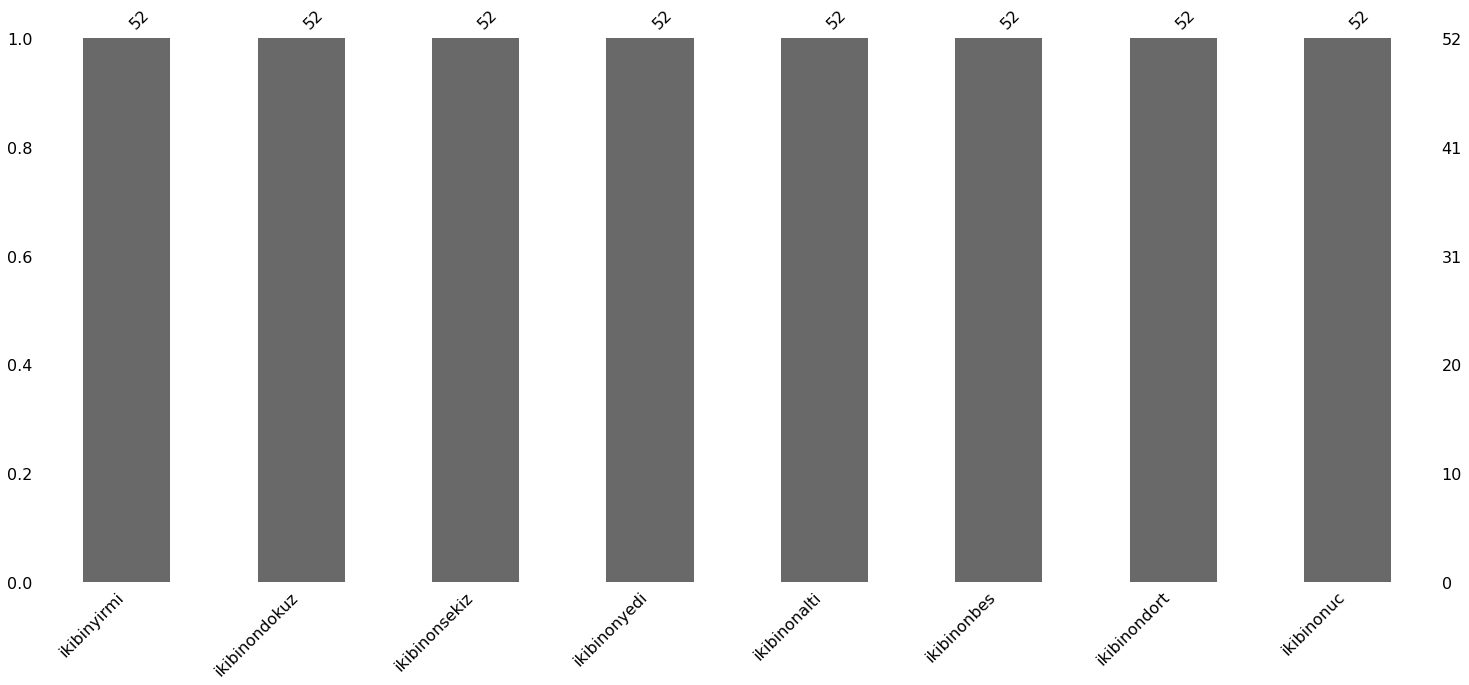

In [95]:
import missingno as msno
msno.bar(bg);

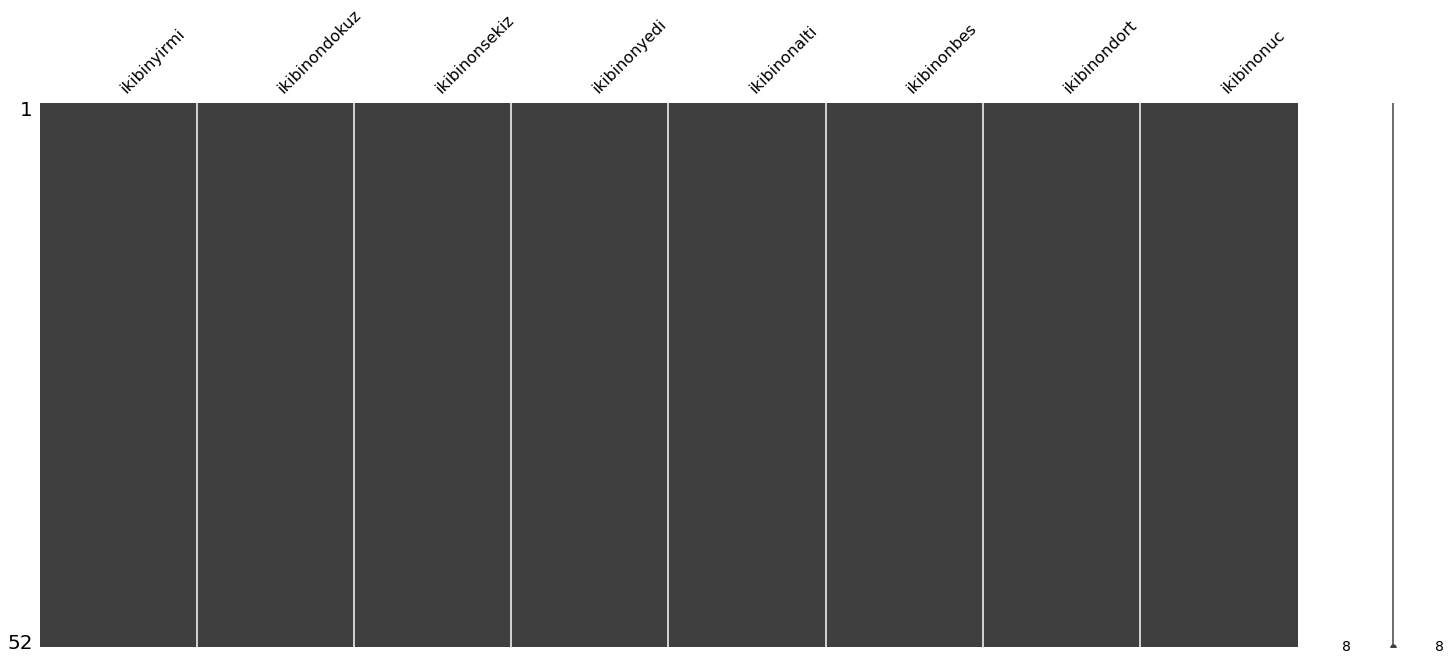

In [96]:
msno.matrix(bg);

In [97]:
bg.isnull().sum()

ikibinyirmi      0
ikibinondokuz    0
ikibinonsekiz    0
ikibinonyedi     0
ikibinonalti     0
ikibinonbes      0
ikibinondort     0
ikibinonuc       0
dtype: int64

C:\Users\BÜŞRA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\BÜŞRA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


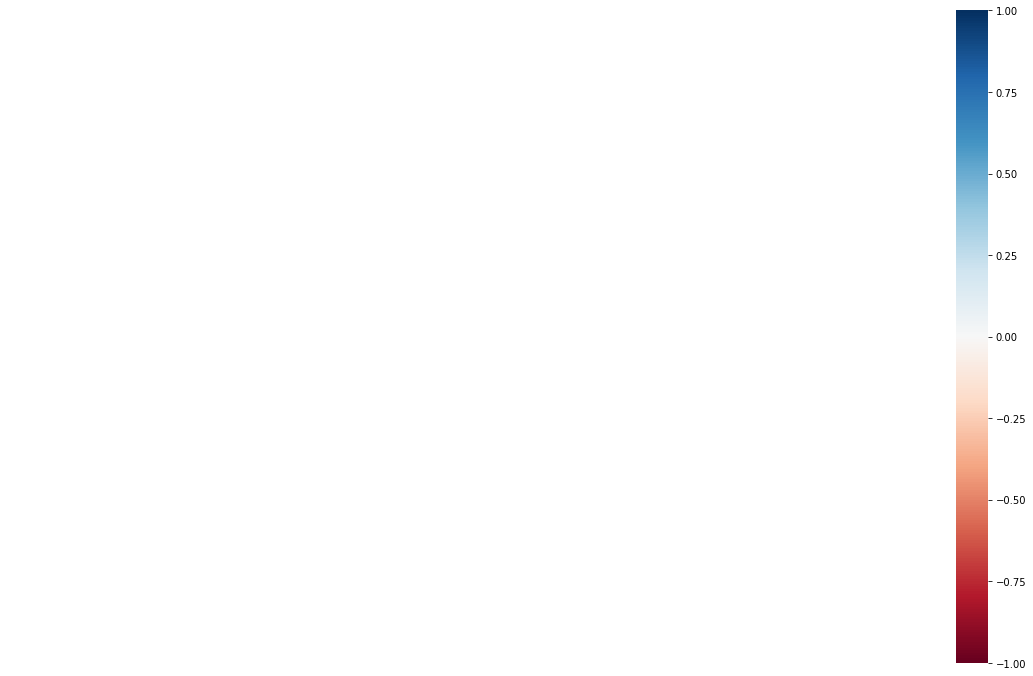

In [98]:
msno.heatmap(bg);

In [99]:
!pip install ycimpute

You should consider upgrading via the 'C:\Users\BÜŞRA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [100]:
                          11. KNN (K-Nearest Neighbors) En yakın komşu 
from ycimpute.imputer import knnimput

In [101]:
var_names = list(bg)
var_names

['ikibinyirmi',
 'ikibinondokuz',
 'ikibinonsekiz',
 'ikibinonyedi',
 'ikibinonalti',
 'ikibinonbes',
 'ikibinondort',
 'ikibinonuc']

In [102]:
import numpy as np
n_bg = np.array(bg)
n_bg

array([[430, 497, 478, 414, 414, 379, 348, 360],
       [  2,   1,   6,   2,   6,   2,   5,   3],
       [ 11,  11,  16,  10,  15,  16,  14,  11],
       [ 28,  26,  23,  29,  29,  28,  22,  22],
       [ 37,  42,  53,  42,  35,  40,  38,  45],
       [ 55,  69,  68,  64,  50,  54,  41,  50],
       [ 56,  72,  68,  59,  77,  60,  67,  67],
       [ 77,  85,  87,  75,  51,  51,  49,  56],
       [ 74,  81,  68,  49,  65,  47,  44,  47],
       [ 47,  50,  40,  39,  40,  31,  31,  23],
       [ 22,  35,  23,  20,  18,  32,  13,  17],
       [ 16,  16,  12,  15,  19,  13,  16,   9],
       [  5,   9,  14,  10,   9,   5,   8,  10],
       [ 60,  66,  63,  77,  58,  46,  53,  32],
       [  1,   0,   0,   1,   1,   0,   0,   1],
       [  0,   4,   4,   0,   3,   2,   4,   0],
       [  5,   4,   4,   8,   2,   6,   5,   5],
       [ 10,   8,   8,   7,  12,   8,   9,   2],
       [  7,   8,  12,  19,   9,   7,   8,   4],
       [ 16,  15,  10,  15,   7,   7,  11,   5],
       [  9,   7,  1

In [103]:
n_bg.shape

(52, 8)

In [ ]:
                                  12. Değişken Standardizasyonu

In [ ]:
                                      12.1 Standardizasyon

#Değişkenin kendi içindeki bilgi ve varyans yapısını bozmadan, değerleri değiştirip belli bir formata sokup 
#bu formatta işlenmesine olanak sağlamak için veriyi standart hale getirme işlemine standardizasyon adını 
#veriyoruz. Değişken (veri) standardizasyonunda taşınan bilginin dağılımı yayılımı değişmez. Bu kısmı biraz 
#daha açmak gerekirse istatiksel değerler korunur, mesela 10. Sırada olan bir veri yeni formatta tekrar 10. 
#Sırada yer alır.

#Verisetinin taşıdığı bilginin özütünü bozmadan (varyansı değişmez), belirli bir standarta getirir 
#(bilgiyi değiştirir).

#Dönüştürme ise bilgiyi bazen bozar bazen de temsil şeklini değiştirir.

In [104]:
from sklearn import preprocessing 
bg2=preprocessing.scale(bg)

In [105]:
bg

,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,430,497,478,414,414,379,348,360
1,2,1,6,2,6,2,5,3
2,11,11,16,10,15,16,14,11
3,28,26,23,29,29,28,22,22
4,37,42,53,42,35,40,38,45
5,55,69,68,64,50,54,41,50
6,56,72,68,59,77,60,67,67
7,77,85,87,75,51,51,49,56
8,74,81,68,49,65,47,44,47
9,47,50,40,39,40,31,31,23


In [106]:
bg2 = pd.DataFrame(bg2, columns = var_names)
bg2

,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,3.835073,3.886503,3.977698,4.236873,4.305456,4.326816,4.334732,4.226935
1,-0.431530,-0.441118,-0.395560,-0.453638,-0.389957,-0.427031,-0.395417,-0.395948
2,-0.341811,-0.353868,-0.302907,-0.362560,-0.286381,-0.250496,-0.271302,-0.292354
3,-0.172343,-0.222992,-0.238049,-0.146250,-0.125264,-0.099180,-0.160978,-0.149913
4,-0.082625,-0.083391,0.039912,0.001751,-0.056214,0.052136,0.059671,0.147920
5,0.096811,0.152185,0.178893,0.252216,0.116412,0.228672,0.101042,0.212667
6,0.106780,0.178360,0.178893,0.195292,0.427137,0.304330,0.459596,0.432804
7,0.316123,0.291786,0.354935,0.377448,0.127920,0.190843,0.211366,0.290362
8,0.286217,0.256885,0.178893,0.081445,0.289037,0.140404,0.142414,0.173819
9,0.017062,-0.013591,-0.080538,-0.032403,0.001328,-0.061351,-0.036863,-0.136963


In [107]:
                                           12.2 Normalizasyon

#Değerleri [0,1] aralığına dönüştürür.

In [108]:
bg3=preprocessing.normalize(bg)
bg3 = pd.DataFrame(bg3, columns = var_names)
bg3

,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,0.363737,0.420413,0.404341,0.350203,0.350203,0.320596,0.294373,0.304524
1,0.183340,0.091670,0.550019,0.183340,0.550019,0.183340,0.458349,0.275010
2,0.294408,0.294408,0.428230,0.267644,0.401466,0.428230,0.374701,0.294408
3,0.380223,0.353064,0.312326,0.393802,0.393802,0.380223,0.298747,0.298747
4,0.312707,0.354965,0.447932,0.354965,0.295804,0.338062,0.321159,0.380319
5,0.340422,0.427075,0.420885,0.396127,0.309474,0.334232,0.253769,0.309474
6,0.299624,0.385231,0.363829,0.315675,0.411983,0.321025,0.358478,0.358478
7,0.399834,0.441375,0.451761,0.389449,0.264825,0.264825,0.254440,0.290788
8,0.429819,0.470477,0.394969,0.284610,0.377543,0.272993,0.255568,0.272993
9,0.431193,0.458716,0.366972,0.357798,0.366972,0.284404,0.284404,0.211009


In [109]:
                                      12.3 Min-Max Dönüşümü

#Değerleri belirlediğimiz bir aralıkta olacak şekilde dönüştürür.


In [110]:
scaler=preprocessing.MinMaxScaler(feature_range = (100,200))
bg4=scaler.fit_transform(bg)
bg4 = pd.DataFrame(bg4, columns = var_names)
bg4

,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,171.192053,172.343523,174.570983,182.306163,183.434343,183.664459,184.466019,181.264108
1,100.331126,100.145560,100.936037,100.397614,101.010101,100.441501,101.213592,100.677201
2,101.821192,101.601164,102.496100,101.988072,102.828283,103.532009,103.398058,102.483070
3,104.635762,103.784571,103.588144,105.765408,105.656566,106.181015,105.339806,104.966140
4,106.125828,106.113537,108.268331,108.349901,106.868687,108.830022,109.223301,110.158014
5,109.105960,110.043668,110.608424,112.723658,109.898990,111.920530,109.951456,111.286682
6,109.271523,110.480349,110.608424,111.729622,115.353535,113.245033,116.262136,115.124153
7,112.748344,112.372635,113.572543,114.910537,110.101010,111.258278,111.893204,112.641084
8,112.251656,111.790393,110.608424,109.741551,112.929293,110.375276,110.679612,110.609481
9,107.781457,107.278020,106.240250,107.753479,107.878788,106.843267,107.524272,105.191874


In [111]:
print(bg.mean())
print(bg2.mean())
print(bg3.mean())
print(bg4.mean())

ikibinyirmi      45.288462
ikibinondokuz    51.557692
ikibinonsekiz    48.692308
ikibinonyedi     41.846154
ikibinonalti     39.884615
ikibinonbes      35.865385
ikibinondort     33.673077
ikibinonuc       33.576923
dtype: float64
ikibinyirmi     -3.629575e-17
ikibinondokuz    1.281027e-17
ikibinonsekiz   -1.921540e-17
ikibinonyedi    -2.348549e-17
ikibinonalti    -1.708035e-17
ikibinonbes      8.540177e-18
ikibinondort     3.202566e-17
ikibinonuc      -1.921540e-17
dtype: float64
ikibinyirmi      0.316980
ikibinondokuz    0.380101
ikibinonsekiz    0.383819
ikibinonyedi     0.381906
ikibinonalti     0.331110
ikibinonbes      0.265503
ikibinondort     0.282646
ikibinonuc       0.253425
dtype: float64
ikibinyirmi      107.498090
ikibinondokuz    107.504759
ikibinonsekiz    107.596304
ikibinonyedi     108.319315
ikibinonalti     107.855478
ikibinonbes      107.917303
ikibinondort     108.173077
ikibinonuc       107.579441
dtype: float64
